In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv', index_col=0)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [115]:
df.describe()

,carat,depth,table,price,purity_level,size
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,0.792084,129.852555
std,0.473594,1.435454,2.233904,3985.527795,0.925044,78.621399
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,0.000000,65.135658
50%,0.700000,61.800000,57.000000,2401.000000,1.000000,114.832253
75%,1.040000,62.500000,59.000000,5312.000000,1.000000,170.844390
max,5.010000,79.000000,95.000000,18823.000000,9.000000,3840.598060


# 1. EDA: 

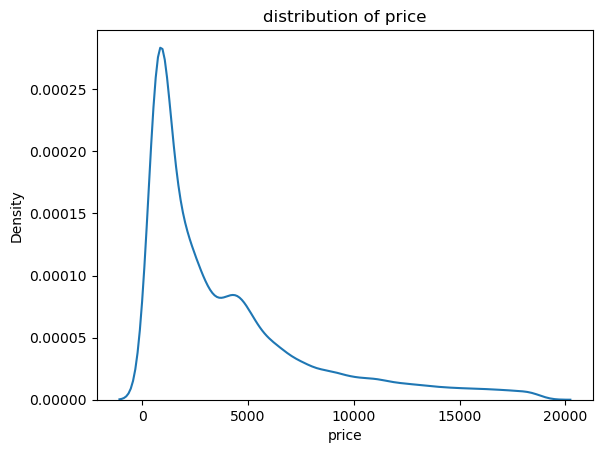

In [5]:
sns.kdeplot(data = df, x='price')
plt.title('distribution of price')
plt.show()


Looks like an exponential distribution of some sort

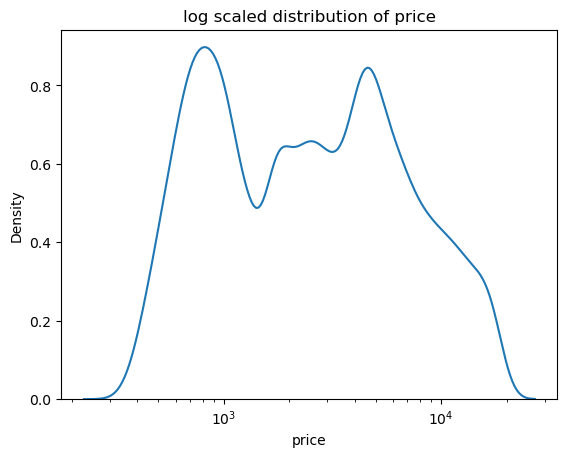

In [6]:
sns.kdeplot(data = df, x='price', log_scale=(True, False))
plt.title('log scaled distribution of price')
plt.show()

In [7]:
df['carat'].describe()

count    43152.000000
mean         0.797855
std          0.473594
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

<Axes: xlabel='carat', ylabel='Count'>

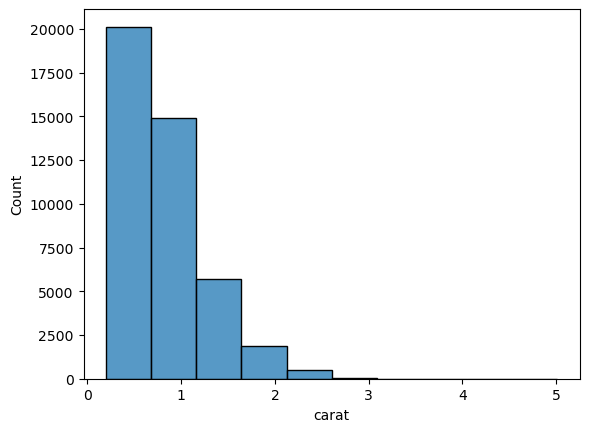

In [8]:
sns.histplot(data=df, x='carat', bins=10)

carat might be binned into categories

In [12]:
purity_levels = pd.cut(df['carat'], bins=10, labels=False)

In [13]:
df['purity_level'] = purity_levels

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,purity_level
Id,,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,1
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,2
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,0
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,0
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,1


In [16]:
df['size'] = df['x'] * df['y'] * df['z']

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,purity_level,size
Id,,,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,1,176.483340
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,2,246.965796
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,0,52.943373
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,0,86.422842
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,1,115.315200


In [19]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,purity_level,size
Id,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,1,176.483340
2,1.51,Premium,G,VVS2,60.9,58.0,15164,2,246.965796
3,0.32,Ideal,F,VS2,61.3,56.0,828,0,52.943373
4,0.53,Ideal,G,VS2,61.2,56.0,1577,0,86.422842
5,0.70,Premium,H,VVS2,61.0,57.0,2596,1,115.315200


In [21]:
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder

In [22]:
df['cut'].value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

In [23]:
df['color'].value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

In [25]:
cut_order = 'Fair, Good, Very Good, Premium, Ideal'.split(', ')

In [92]:
color_order = list('DEFGHIJ')

In [93]:
color_order = list(reversed(color_order))

In [94]:
color_order

['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [95]:
clarity_order = 'I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF'.split(', ')

In [96]:
clarity_order

['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [97]:
clarity_enc = OrdinalEncoder(categories=[clarity_order])

In [98]:
color_enc = OrdinalEncoder(categories=[color_order])

In [99]:
cut_enc = OrdinalEncoder(categories=[cut_order])

In [100]:
X = df.drop('price',axis=1).copy()
y = df['price']

In [101]:
X['clarity'] = clarity_enc.fit_transform(X[['clarity']])
X['cut'] = cut_enc.fit_transform(X[['cut']])
X['color'] = color_enc.fit_transform(X[['color']])

In [102]:
X.head()

,carat,cut,color,clarity,depth,table,purity_level,size
Id,,,,,,,,
1,1.06,4.0,1.0,1.0,61.8,57.0,1,176.483340
2,1.51,3.0,3.0,5.0,60.9,58.0,2,246.965796
3,0.32,4.0,4.0,3.0,61.3,56.0,0,52.943373
4,0.53,4.0,3.0,3.0,61.2,56.0,0,86.422842
5,0.70,3.0,2.0,5.0,61.0,57.0,1,115.315200


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test  = train_test_split(X, y)

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.25)
cross_val_score(model, X=X_train, y=y_train, n_jobs=-1, cv=10, scoring='neg_root_mean_squared_error')

array([-517.14299439, -559.43284304, -599.34093975, -566.30170565,
       -580.13679055, -591.89794411, -601.2281448 , -630.95685046,
       -594.16645888, -554.79795782])

In [130]:
from sklearn.neural_network import MLPRegressor
mlp_model=MLPRegressor(hidden_layer_sizes=(7,12), activation='relu', learning_rate='adaptive', learning_rate_init=0.01, max_iter=1300)
cross_val_score(mlp_model, X=X_train, y=y_train, n_jobs=-1, cv=10, scoring='neg_root_mean_squared_error')

array([-800.71987876, -780.97369113, -775.891919  , -829.99515618,
       -811.90481523, -771.90048691, -796.05371093, -743.06564931,
       -792.32306116, -832.27221767])

In [123]:
from sklearn.metrics import mean_squared_error
model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.25, n_estimators=150)

In [124]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))

569.1412131171128

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [86]:
cat_steps = [
    ('ordinal_cut', cut_enc, ['cut']),
    ('ordinal_color', color_enc, ['color']),
    ('ordinal_clarity', clarity_enc, ['clarity']),
]

cat_trans = ColumnTransformer(cat_steps)

AttributeError: 'DataFrame' object has no attribute 'is_numeric'